In [111]:
'''
Gaussian Normal Distribution

Dataset: https://www.kaggle.com/adithyabshetty100/student-performance
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [112]:
data = pd.read_csv('~/Desktop/Sklearn Data Sets/Student Performance/Student Performance.csv')
print(data.info(),'\n')
print(data.head(),'\n')
print("Reading scores summary:\n",data['reading score'].describe(), '\n')
print("Writing scores summary:\n",data['writing score'].describe(), '\n')
print("Math scores summary:\n",data['math score'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None 

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree     

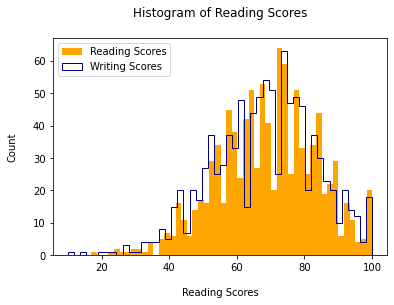

In [153]:
# Create the Histogram
reading_scores = data['reading score']
writing_scores = data['writing score']
math_scores = data['math score']

plt.hist(reading_scores, bins=50, color='orange', histtype='barstacked', label='Reading Scores')
plt.hist(writing_scores, bins=50, histtype='step', color='navy', label='Writing Scores')
plt.xlabel('\nReading Scores')
plt.legend()
plt.ylabel('Count\n')
plt.title('Histogram of Reading Scores\n')
plt.show()

In [122]:
# What percent of values are within 1 standard deviation of the mean

# Reading Scores
rs_mean = data['reading score'].mean()
rs_std_dev = data['reading score'].std()

new_data_reading = data[data['reading score']> (rs_mean - rs_std_dev)]
new_data_reading = new_data_reading[new_data_reading['reading score']< (rs_mean + rs_std_dev)]

print("Reading Scores within 1 std dev: ", len(new_data_reading)/len(data)*100, '\b%')

# Writing Scores
ws_mean = data['writing score'].mean()
ws_std_dev = data['writing score'].std()

new_data_writing = data[data['writing score']> (ws_mean - ws_std_dev)]
new_data_writing = new_data_writing[new_data_writing['writing score']< (ws_mean + ws_std_dev)]

print("Writing Scores within 1 std dev: ", len(new_data_writing)/len(data)*100, '\b%')

Reading Scores within 1 std dev:  66.4%
Writing Scores within 1 std dev:  68.8%


In [124]:
# Plotting the normal curve over the histogram
# Reading Scores
r_mu, r_sigma = rs_mean, rs_std_dev
r_s = np.random.normal(r_mu, r_sigma, 1000)

print("Reading Means: ", abs(r_mu - np.mean(r_s)))
print("Reading Standard Deviations: ", abs(r_sigma - np.std(r_s)))

# Writing Scores
w_mu, w_sigma = ws_mean, ws_std_dev
w_s = np.random.normal(w_mu, w_sigma, 1000)

print("Writing Means: ", abs(w_mu - np.mean(w_s)))
print("Writing Standard Deviations: ", abs(w_sigma - np.std(w_s)))


Reading Means:  0.2031916763372692
Reading Standard Deviations:  0.13560266749330552
Writing Means:  0.7804286873762436
Writing Standard Deviations:  0.06752284010606857


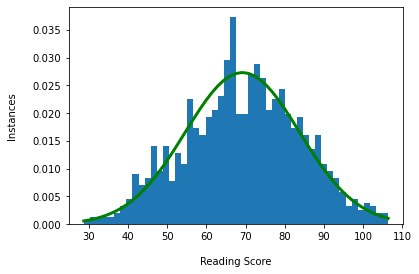

In [171]:
# Plot the Reading scores with the curve added

count, bins, ignored = plt.hist(r_s, 50, density=True)
#plt.hist(reading_scores, bins=25, color='blue', histtype='barstacked', label='Reading Scores')

plt.plot(bins, 1/(r_sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - r_mu)**2/(2 * r_sigma**2)), linewidth=3, color='g')
plt.xlabel('\nReading Score')
plt.ylabel('Instances\n')
plt.show()

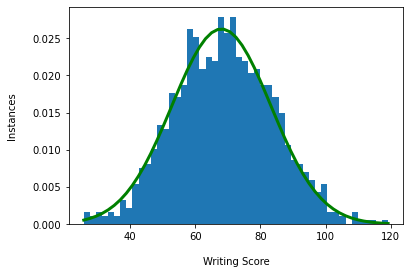

In [173]:
# Plot the Reading scores with the curve added

count, bins, ignored = plt.hist(w_s, 50, density=True)

plt.plot(bins, 1/(w_sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - w_mu)**2/(2 * w_sigma**2)), linewidth=3, color='g')
plt.xlabel('\nWriting Score')
plt.ylabel('Instances\n')
plt.show()